# NFL Tracking Data Exploratory Data Analysis
__Author:__ Jack Friedman <br>
__Date:__ 12/6/2023 <br>
__Purpose:__ Create Data Exploration figures for Kaggle Report

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../preprocessing')
from Preprocessing_v6 import *
from DataLoader import *

2023-12-06 21:21:15.359660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data
[games_df, players_df, plays_df, tracking_df] = load_data()

loaded games df
shape: (136, 9)
-----
loaded players df
shape: (1683, 7)
-----
loaded plays df
shape: (12486, 35)
-----
loading tracking frames...
loaded tracking frames
shape: (12187398, 17)
returning 4 frames


In [3]:
# Preprocess data
tracking_df_clean = preprocess_all_df(plays_df, games_df, players_df, tracking_df)
plays_df_clean = preprocess_plays_df_naive_models(plays_df, games_df, include_nfl_features = True)

cleaning plays_df
final plays data shape: (6840, 289)
-----

cleaning games_df
-----

cleaning players_df
-----

cleaning tracking_df
original tracking df shape: (12187398, 17)
unique play and game id combos: (6840, 2)
filtered df shape: (8458178, 17)
number of merge errors: 0
joined plays and tracking dataframes
original tracking shape: (8458178, 17)
merged data shape: (8458178, 20)
-------
joined players and tracking dataframes
original tracking shape: (8458178, 20)
merged data shape: (8458178, 22)
-------
joined games and tracking dataframes
original tracking shape: (8458178, 22)
merged data shape: (8458178, 23)
-------
Old df shape:(8458178, 62)
New df shape:(8458178, 62)
-----

final plays data shape: (6840, 289)


In [5]:
# Step 1: Get the frames where handoff or run occurs 
frame_cutoffs = tracking_df_clean[(tracking_df_clean['event'] == 'run') | (tracking_df_clean['event'] == 'handoff')][['gameId', 'playId', 'frameId', 'TARGET']].drop_duplicates()

# Step 2: Handle duplicate handoffs - Drop all duplicate handoff plays
frame_cutoffs = frame_cutoffs.drop_duplicates(subset=['gameId', 'playId'], keep=False)

# Step 3: Rename cutoff column
frame_cutoffs = frame_cutoffs.rename(columns = {'frameId':'frame_cutoff'})

## Tackling location distribution

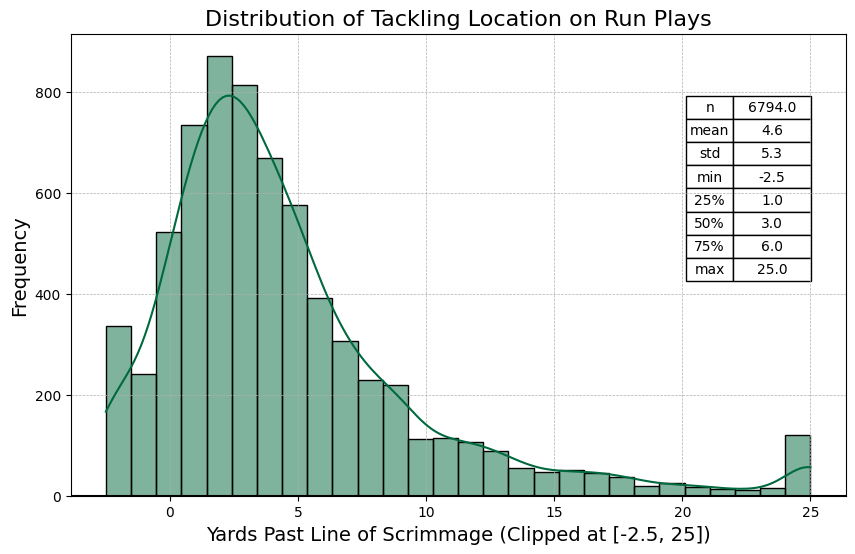

In [10]:
# Plot Distribution of tackling location

data = frame_cutoffs['TARGET']

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data, kde=True, bins=28, color=[0, 105 / 255, 62 / 255, 1])

# Add titles and labels
plt.title('Distribution of Tackling Location on Run Plays', fontsize=16)
plt.xlabel('Yards Past Line of Scrimmage (Clipped at [-2.5, 25])', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=1.5)

stats = data.describe()
stats.rename({'count': 'n'}, inplace=True)
stats[:] = stats[:].round(1)
stats_table = pd.DataFrame(stats)

plt.table(cellText=stats_table.values,
          rowLabels=stats_table.index,
          cellLoc='center',
          rowLoc='center',
          loc='top right',  # Adjust location as needed
          bbox=[0.855, 0.465, 0.1, 0.4])  # Adjust box location and size


# Show the plot
plt.show()

## Frame count distribution

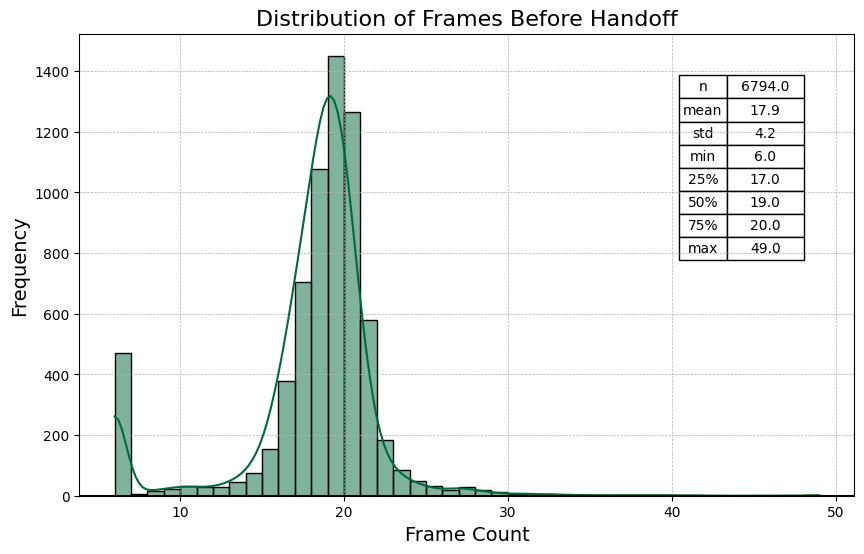

In [7]:

data = frame_cutoffs['frame_cutoff']

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data, kde=True, bins=43, color=[0, 105 / 255, 62 / 255, 1])

# Add titles and labels
plt.title('Distribution of Frames Before Handoff', fontsize=16)
plt.xlabel('Frame Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=1.5)

stats = data.describe()
stats.rename({'count': 'n'}, inplace=True)
stats[:] = stats[:].round(1)
stats_table = pd.DataFrame(stats)

plt.table(cellText=stats_table.values,
          rowLabels=stats_table.index,
          cellLoc='center',
          rowLoc='center',
          loc='top right',  # Adjust location as needed
          bbox=[0.835, 0.51, 0.1, 0.4])  # Adjust box location and size


# Show the plot
plt.show()